In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# 读取数据，pd.read_csv默认生成DataFrame对象，需将其转换成Series对象
df = pd.read_csv('../dataset/GOOGL-year.csv',header=0)
df.index = pd.to_datetime(df['Date'])  # 将字符串索引转换成时间索引
df_new=pd.DataFrame(columns=['center','radius'])
df_new['center']=pd.Series((df['High'].values+df['Low'].values)/2)
df_new['radius']=pd.Series((df['High'].values-df['Low'].values)/2)
df_new.index=df.index
df_new.head()

,center,radius
Date,,
2018-02-02,1121.235046,10.065002
2018-02-05,1085.864990,29.125000
2018-02-06,1058.695007,28.684998
2018-02-07,1070.575012,15.955017
2018-02-08,1034.315033,29.615021


In [3]:
# 移动平均图
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()
 
    timeseries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
 
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()
 
# Dickey-Fuller test:
def teststationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput


In [19]:
diff_1=df_new.diff(1)
diff_1.dropna(inplace=True)
diff_1.head()
#draw_trend(diff_1,12)

,center,radius
Date,,
2018-02-05,-35.370056,19.059998
2018-02-06,-27.169983,-0.440002
2018-02-07,11.880005,-12.729981
2018-02-08,-36.259979,13.660004
2018-02-09,-9.955047,-2.255036


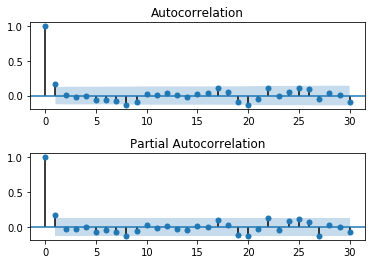

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.show()
draw_acf_pacf(diff_1['center'],30)
# draw_acf_pacf(diff_1['radius'],30)

In [23]:
print(diff_1.shape)
print(diff_1.head())

(250, 2)
               center     radius
Date                            
2018-02-05 -35.370056  19.059998
2018-02-06 -27.169983  -0.440002
2018-02-07  11.880005 -12.729981
2018-02-08 -36.259979  13.660004
2018-02-09  -9.955047  -2.255036


In [27]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
arma_mod21 = sm.tsa.ARMA(diff_1['center'],(2,1)).fit()
print("arma_mod21:",arma_mod21.aic,arma_mod70.bic,arma_mod21.hqic)
arma_mod20 = sm.tsa.ARMA(diff_1['center'],(2,0)).fit()
print("arma_mod20:",arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod01 = sm.tsa.ARMA(diff_1['center'],(0,1)).fit()
print("arma_mod01:",arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)
# model = ARIMA(df_new['center'], order=(15,1,0)) 
# model_arima = model.fit( disp=0)

arma_mod21: 2085.967098379836 2103.5744029691473 2093.053523222896
arma_mod20: 2084.2400581247302 2098.325901796179 2089.909197999178
arma_mod01: 2082.318515727431 2092.882898481018 2086.570370633267


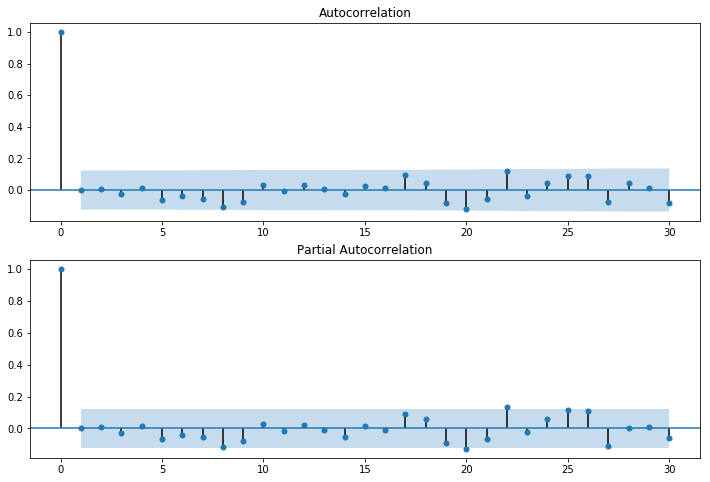

In [29]:
resid = arma_mod01.resid#残差
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=30, ax=ax2)

In [30]:
print(sm.stats.durbin_watson(resid))

1.977525286466384


In [31]:
predict_sunspots=arma_mod01.predict()

In [35]:
print(predict_sunspots)
print(diff_1)

Date
2018-02-05   -0.006154
2018-02-06   -5.951748
2018-02-07   -3.677261
2018-02-08    2.687791
2018-02-09   -6.750643
2018-02-12   -0.561053
2018-02-13    5.488636
2018-02-14   -1.209426
2018-02-15    1.686461
2018-02-16    2.824013
2018-02-20    2.840907
2018-02-21    0.058621
2018-02-22    3.223655
2018-02-23   -1.698633
2018-02-26    0.879358
2018-02-27    2.967244
2018-02-28   -1.602272
2018-03-01   -2.359976
2018-03-02   -4.107631
2018-03-05   -2.893274
2018-03-06    3.650855
2018-03-07    1.671687
2018-03-08    0.222134
2018-03-09    3.637782
2018-03-12    3.403049
2018-03-13    3.047126
2018-03-14   -2.680234
2018-03-15   -0.447687
2018-03-16   -0.270631
2018-03-19   -0.824261
                ...   
2018-12-19    1.515569
2018-12-20    0.161723
2018-12-21   -3.483661
2018-12-24   -2.558001
2018-12-26   -2.081055
2018-12-27    4.797701
2018-12-28    0.828912
2018-12-31    3.823639
2019-01-02   -1.551435
2019-01-03   -0.599867
2019-01-04    0.319373
2019-01-07    2.382801
2019-0

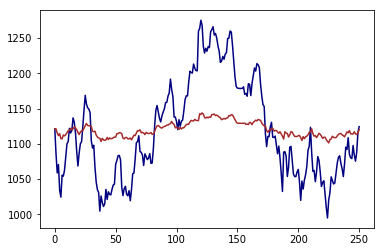

In [33]:
#predict_sunspots=model_arima.predict()
diff_center_recover=pd.Series(df_new['center'].iloc[0]).append(pd.Series(predict_sunspots)).cumsum()
plt.plot(df_new['center'].values,color='navy')
plt.plot(diff_center_recover.values,color='brown')
plt.show()

In [ ]:
# 多步预测部分
df_all=pd.read_csv('../dataset/GOOGL-year-now.csv',header=0)
df_all.index=pd.to_datetime(df_all['Date'])
df_new_all=pd.DataFrame(columns=['center','radius'])
df_new_all['center']=pd.Series((df_all['High'].values+df_all['Low'].values)/2)
df_new_all['radius']=pd.Series((df_all['High'].values-df_all['Low'].values)/2)
df_new_all.index=df_all.index
df_new_all.head()
test=df_new_all['2019-02-02':]
test.head()

In [ ]:
print(type(ct_test.iloc[0]))
print(type(diff_1))

In [ ]:
predictions=list()
train=diff_1['center'].values
for i in range(60):
    model = ARIMA(train, order=(1,1,1)) 
    model_arima = model.fit(disp=0)
    predict_ts = model_arima.forecast()
    yhat=predict_ts[0]
    predictions.append(yhat)
    train = np.append(train,yhat) #直接向p_arr里添加p_
diff_center_recover=pd.Series(test['center'].iloc[0]).append(pd.Series(predictions)).cumsum()

In [ ]:
#print(predictions)
print(predictions)


In [ ]:
plt.plot(diff_center_recover,color='blue', label='Predict')
plt.plot(test['center'].values,color='orange',label='Origin')
#df_new['center'].plot(color='red', label='Original')
plt.legend(loc='best')
plt.show()